To avoid confusion later, we'll use $(k)$ instead of $(i)$ for indexing the observations $x^{(k)}$. And we'll use $i$ and $j$ to index the dimensions of $x^{(k)}$. Suppose the $x^{(k)}$ are $n$-dimensional vectors and recall that $x_0^{(k)}\equiv1$. Define $g(z)\equiv\frac{1}{1+e^{-z}}$ to be the sigmoid function and let $z^{(k)}\equiv y^{(k)} \theta^T x^{(k)}= y^{(k)}\sum_{i=0}^n\theta_ix_i^{(k)}$. Then

$$
J(\theta)=\frac{1}{m} \sum_{k=1}^{m} \mathrm{log}\big(1 + e^{-y^{(k)} \theta^T x^{(k)}}\big)=\frac{1}{m} \sum_{k=1}^{m} \mathrm{log}\Big(\Big[\frac{1}{1 + e^{-y^{(k)} \theta^T x^{(k)}}}\Big]^{-1}\Big)=-\frac{1}{m} \sum_{k=1}^{m} \mathrm{log}\big(g(z^{(k)})\big)
$$

Note that the derivative of the sigmoid is

$$
\frac{\partial g}{\partial z} =\frac{\partial \frac{1}{1 + e^{-z}}}{\partial z}  
                              =\frac{0 - 1 \cdot\frac{\partial (1 + e^{-z})}{\partial z}}{(1 + e^{-z})^2} 
                              =\frac{--e^{-z}}{(1 + e^{-z})^2}
                              =\frac{e^{-z}}{(1 + e^{-z})^2} 
                              =\frac{1}{1 + e^{-z}} \cdot \frac{e^{-z}}{1 + e^{-z}}
                              =\frac{1}{1 + e^{-z}} \cdot \frac{1+e^{-z}-1}{1 + e^{-z}}
                              =g(1 - g)
$$

So

\begin{align*}
\frac{\partial J}{\partial \theta_i} 
 &= -\frac{1}{m} \sum_{k=1}^{m} \frac{1}{g(z^{(k)})} \frac{\partial g(z^{(k)})}{\partial z^{(k)}} \frac{\partial z^{(k)}(\theta_i)}{\partial \theta_i}  \\
 &= -\frac{1}{m} \sum_{k=1}^{m} \frac{1}{g(z^{(k)})} g(z^{(k)}) (1 - g(z^{(k)})) \frac{\partial z^{(k)}}{\partial \theta_i}  \\
 &= -\frac{1}{m} \sum_{k=1}^{m} (1 - g(z^{(k)})) \frac{\partial (y^{(k)} \theta^T x^{(k)})}{\partial \theta_i}  \\
 &= -\frac{1}{m} \sum_{k=1}^{m} (1 - g(z^{(k)})) y^{(k)} x_i^{(k)}  \\
 &= \frac{1}{m} \sum_{k=1}^{m} (g(z^{(k)}) - 1) y^{(k)} x_i^{(k)}  \\
\end{align*}

and

\begin{align*}
H_{ij} = \frac{\partial^2 J}{\partial \theta_i\partial \theta_j} 
&= \frac{1}{m} \sum_{k=1}^{m} \frac{\partial (g(z^{(k)}) - 1)}{\partial \theta_j} y^{(k)} x_i^{(k)} \\
&= \frac{1}{m} \sum_{k=1}^{m} \frac{\partial g(z^{(k)})}{\partial \theta_j} y^{(k)} x_i^{(k)} \\
&= \frac{1}{m} \sum_{k=1}^{m} g(z^{(k)})(1 - g(z^{(k)})) \frac{\partial z^{(k)}}{\partial \theta_j} y^{(k)} x_i^{(k)} \\
&= \frac{1}{m} \sum_{k=1}^{m} g(z^{(k)})(1 - g(z^{(k)})) y^{(k)} x_j^{(k)} y^{(k)} x_i^{(k)} \\
&= \frac{1}{m} \sum_{k=1}^{m} g(z^{(k)})(1 - g(z^{(k)})) x_i^{(k)} x_j^{(k)} \\
\end{align*}

The last equation follows because $y^{(k)}\in\{-1,1\}$.

And now we can show that $H$ is Positive Semi-definite. We will include the intercept term so that $H$ is $(n+1)\times(n+1)$. For any vector $v\in\mathbb{R}^{n+1}$:

\begin{align*}
v^THv &= \begin{bmatrix}v_0&v_1&v_2&\dots&v_n\end{bmatrix}\begin{bmatrix}H_{00}&H_{01}&H_{02}&\dots&H_{0n}\\ H_{10}&H_{11}&H_{12}&\dots&H_{1n}\\ H_{20}&H_{21}&H_{22}&\dots&H_{2n}\\ \vdots&\vdots&\vdots&\ddots&\vdots\\ H_{n0}&H_{n1}&H_{n2}&\dots&H_{nn}\end{bmatrix}\begin{bmatrix}v_0\\ v_1\\ v_2\\ \vdots\\ v_n\end{bmatrix} \\
&= \begin{bmatrix}v_0&z_1&v_2&\dots&v_n\end{bmatrix}\begin{bmatrix}\sum_{j=0}^nH_{0j}v_j\\ \sum_{j=0}^nH_{1j}v_j\\ \sum_{j=0}^nH_{2j}v_j\\ \vdots\\ \sum_{j=0}^nH_{nj}v_{j} \end{bmatrix} \\
&= \sum_{i=0}^{n} \sum_{j=0}^{n} v_i H_{ij} v_j \\
           &= \sum_{i=0}^{n} \sum_{j=0}^{n} [v_i \frac{1}{m} \sum_{k=1}^{m} g(z^{(k)})(1 - g(z^{(k)})) x_i^{(k)} x_j^{(k)}] v_j \\
           &= \frac{1}{m} \sum_{k=1}^{m} g(z^{(k)})(1 - g(z^{(k)})) \sum_{i=0}^{n} \sum_{j=0}^{n} v_i x_i^{(k)} x_j^{(k)} v_j\tag{1}
\end{align*}
Note that for any $k=1,...,m$, we have

\begin{align*}
\sum_{i=0}^{n} \sum_{j=0}^{n} v_i x_i^{(k)} x_j^{(k)} v_j &= \sum_{i=0}^{n} v_i x_i^{(k)} \sum_{j=0}^{n} x_j^{(k)} v_j \\
    &= \Big( \sum_{i=0}^{n} v_i x_i^{(k)}\Big) \Big( \sum_{j=0}^{n} x_j^{(k)} v_j\Big) \\
    &= \big(v\cdot x^{(k)}\big) \big(x^{(k)}\cdot v\big) \\
    &= \big(v\cdot x^{(k)}\big)^2\geq0
\end{align*}

Since $1>g(z)>0$ for all $z\in\mathbb{R}$, then $g(z^{(k)})(1-g(z^{(k)}))>0$ for all $k=1,...,m$ and (1) becomes

$$
v^THv = \frac{1}{m} \sum_{k=1}^{m} g(z^{(k)})(1 - g(z^{(k)})) \sum_{i=0}^{n} \sum_{j=0}^{n} v_i x_i^{(k)} x_j^{(k)} v_j\geq0
$$

and $H\succeq0$ is PSD. Hence $J$ is convex and has no local minima besides the single global minimum.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_X = pd.read_csv('./logistic_x.txt', sep='\ +', header=None, engine='python')
print("type(df_X)={} and df_X.shape={}".format(type(df_X),df_X.shape))
print("And the head:")
df_X[:3]


type(df_X)=<class 'pandas.core.frame.DataFrame'> and df_X.shape=(99, 2)
And the head:


,0,1
0,1.343250,-1.331148
1,1.820553,-0.634668
2,0.986321,-1.888576


So each observation $x^{(k)}$ has two features, under the column headings "0" and "1". These are $x_1^{(k)}$ and $x_2^{(k)}$.

In [3]:
ys = pd.read_csv('./logistic_y.txt', sep='\ +', header=None, engine='python')
ys = ys.astype(int)
print("type(ys)={} and ys.shape={}".format(type(ys),ys.shape))
print("And the head:")
ys[:3]

type(ys)=<class 'pandas.core.frame.DataFrame'> and ys.shape=(99, 1)
And the head:


,0
0,-1
1,-1
2,-1


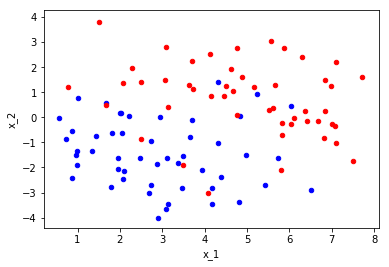

In [4]:
# Let's append the labels to the data
df_X['label'] = ys[0].values
# And let's take a look at the two data points, called "0" and "1", for each observation, colored coded by label:
ax = plt.axes()
df_X.query('label == -1').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')
plt.xlabel('x_1')
plt.ylabel('x_2')

Newton's method (Newton-Raphson method in the multidimensional setting) will find the zero of a function. That is, for a function $f$, it finds $\theta$ such that $f(\theta) = 0$. Now, one way to minimize our loss function $J(\theta)$ is to use the Newton-Raphson method on the gradient $\nabla_{\theta} J(\theta)$. Then the update rule becomes:

$$
\theta := \theta - H^{-1} \nabla_{\theta} J(\theta)
$$



In [5]:
Xs = df_X[[0, 1]].values
Xs.shape

(99, 2)

In [6]:
# adding a columns of ones for the intercept terms, and also use column vectors
Xs = np.hstack([np.ones((Xs.shape[0], 1)), Xs])
ys = df_X['label'].values

For quick reference, we copy the key equations from above:

$$z^{(k)} = y^{(k)} \theta^T x^{(k)}\quad\quad g(z^{(k)}) = \frac{1}{1 + e^{-z^{(k)}}}$$

$$
\frac{\partial J}{\partial \theta_i} 
 = \frac{1}{m} \sum_{k=1}^{m} (g(z^{(k)}) - 1) y^{(k)} x_i^{(k)}
\quad\quad
H_{ij} = \frac{1}{m} \sum_{k=1}^{m} g(z^{(k)})(1 - g(z^{(k)})) x_i^{(k)} x_j^{(k)}
$$

In [7]:
all_thetas = []
theta = np.zeros(Xs.shape[1])
tol = 1e9
n_iters = 0
while tol > 1e-6:
    zs = ys * Xs.dot(theta)
    gzs = 1 / (1 + np.exp(-zs))
    nablaJ = np.mean((gzs - 1) * ys * Xs.T, axis=1)
    
    hessian = np.zeros((Xs.shape[1], Xs.shape[1]))
    for i in range(hessian.shape[0]):
        for j in range(hessian.shape[0]):
            if i <= j:
                hessian[i][j] = np.mean(gzs * (1 - gzs) * Xs[:,i] * Xs[:,j])
                if i != j:
                    hessian[j][i] = hessian[i][j]
            
    delta = np.linalg.inv(hessian).dot(nablaJ)
    old_theta = theta.copy()
    theta -= delta
    all_thetas.append(theta.copy())
    n_iters += 1
    tol = np.sum(np.abs(theta - old_theta))
print('converged after {0} iterations'.format(n_iters))

converged after 7 iterations


In [8]:
all_thetas

[array([-1.50983811,  0.43509696,  0.62161752]),
 array([-2.21834632,  0.64372727,  0.95944716]),
 array([-2.55431051,  0.74137714,  1.13493588]),
 array([-2.61847133,  0.75979248,  1.1707512 ]),
 array([-2.62050954,  0.76037096,  1.17194549]),
 array([-2.6205116 ,  0.76037154,  1.17194674]),
 array([-2.6205116 ,  0.76037154,  1.17194674])]

Recall that

$$
P(y=1|X=x;\theta)=h_\theta(x)=g(z)
$$

where $z=\theta^Tx$ and $g(z)=\frac1{1+e^{-z}}$ is the sigmoid function.

One possible way to predict the value of $y$ is to do this:

$$
\text{prediction}=\begin{cases}\text{predict }y=1&\text{when }h_\theta(x)>\frac{1}{2}\\\text{predict }y=-1&\text{when }h_\theta(x)<\frac{1}{2}\end{cases}
$$

Our logistic/sigmoid function $g(z)=\frac1{1+e^{-z}}$ looks like this:

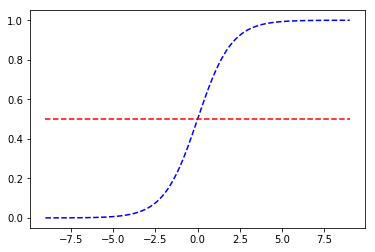

In [9]:
def graph_ineff(funct, x_range, cl='r--', show=False):
    y_range=[]                                                                                   
    for x in x_range:
        y_range.append(funct(x))
    plt.plot(x_range,y_range,cl)
    if show: plt.show()

xr=np.linspace(-9,9,1000)
graph_ineff(lambda z: 1/(1+np.exp(-z)),xr,cl='b--')
graph_ineff(lambda z: 1/2,xr)

Notice that $h_\theta(x)\equiv g(z)$ is greater than $\frac12$ exactly when $\theta^Tx\equiv z>0$.

$$
0<\theta^Tx=\theta_0+\theta_1x_1+\theta_2x_2\iff-\theta_2x_2<\theta_0+\theta_1x_1\iff x_2>\frac{\theta_0+\theta_1x_1}{-\theta_2}
$$

The last equivalence holds because we see that $\theta_2\approx1.17>0$.

So we will predict that $y=1$ (red dots in the graphs below) if and only if $x_2>\frac{\theta_0+\theta_1x_1}{-\theta_2}$. Otherwise, $y=-1$ (blue dots in the graphs below). That is, the line $x_2=\frac{\theta_0+\theta_1x_1}{-\theta_2}$ is our decision boundary:

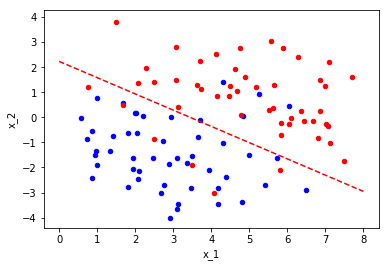

In [10]:
ax = plt.axes()

df_X.query('label == -1').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')
plt.xlabel('x_1')
plt.ylabel('x_2')

theta=all_thetas[-1]
graph_ineff(lambda x1: (theta[0] + theta[1] * x1) / (- theta[2]),np.linspace(0,8,1000))

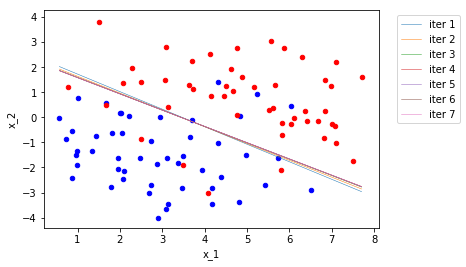

In [11]:
# To see the convergence of the thetas:
ax = plt.axes()

df_X.query('label == -1').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

_x1s = np.array([np.min(Xs[:,1]), np.max(Xs[:,1])])
for k, theta in enumerate(all_thetas):
    _x2s = (theta[0] + theta[1] * _x1s) / (- theta[2])
    plt.plot(_x1s, _x2s, label='iter {0}'.format(k + 1), lw=0.5)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

All of these lines are close together. So, for this dataset, Newton's method has converged very quickly.